In [1]:
from sklearn.cluster import AffinityPropagation as AP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from cluster.dataset import load_time_series

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline
from sklearn.cluster import DBSCAN, KMeans, MiniBatchKMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.gridspec as gridspec

In [2]:
data = load_time_series(1)
data = data.groupby(data.datetime)["pwr"].sum()
data.index = pd.to_datetime(data.index)
time_index = np.unique(data.index.date).astype(str)

In [16]:
from chinese_calendar import get_holidays, is_holiday, holidays, get_holiday_detail
from datetime import datetime as dt

In [12]:
dates = pd.date_range(time_index[0], time_index[-1])

In [22]:
get_holiday_detail(dates[3])

(True, None)

In [36]:
t = pd.DataFrame({"date": dates, "is_holiday": dates.map(lambda x: int(is_holiday(x))), 
              "weekday": dates.weekday, "holiday_details": dates.map(lambda x:get_holiday_detail(x)[-1]
                                                                     if get_holiday_detail(x)[-1] else '')})

In [48]:
ap = AP().fit(data.values.reshape(-1, 48))
kmeans = KMeans().fit(data.values.reshape(-1, 48))
mkmeans = MiniBatchKMeans().fit(data.values.reshape(-1, 48))

In [50]:
t["ap_label"] = ap.labels_
t["kmeans_label"] = kmeans.labels_
t["mbkmeans_label"] = mkmeans.labels_

In [51]:
t

,date,holiday_details,is_holiday,weekday,ap_label,kmeans_label,mbkmeans_label
0,2017-06-01,,0,3,12,7,1
1,2017-06-02,,0,4,6,3,1
2,2017-06-03,,1,5,13,7,1
3,2017-06-04,,1,6,13,7,5
4,2017-06-05,,0,0,6,7,1
5,2017-06-06,,0,1,4,3,3
6,2017-06-07,,0,2,5,3,3
7,2017-06-08,,0,3,4,3,3
8,2017-06-09,,0,4,5,3,3
9,2017-06-10,,1,5,13,7,1


In [52]:
t.mbkmeans_label.unique()

array([1, 5, 3, 4, 6, 2, 0, 7])

In [80]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

In [81]:
cosine_distances(np.zeros([10,5]),np.zeros([10,5]))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [82]:
cosine_distances(np.ones([10,5]),np.ones([10,5]))

array([[  1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16],
       [  1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16],
       [  1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16],
       [  1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16],
       [  1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16,   1.11022302e-16,   1.11022302e-16,
          1.11022302e-16

In [1]:
f, ax = plt.subplots(figsize=(8,8))
plt.imshow(pd.get_dummies(t.ap_label), aspect="auto")

NameError: name 'plt' is not defined

In [65]:
s1 = set(t[t.is_holiday==1]['ap_label'].unique())

In [66]:
s2 = set(t[t.is_holiday==0]['ap_label'].unique())

In [67]:
s1 - s2

{0, 9, 11}

In [68]:
s2 - s1

{1, 2, 3, 7, 16, 18}

In [69]:
s1 & s2

{4, 5, 6, 8, 10, 12, 13, 14, 15, 17}

In [70]:
(s1 | s2) - (s1 & s2)

{0, 1, 2, 3, 7, 9, 11, 16, 18}

In [16]:
def plot_cluster(values, values_index):
    """
    Args:
        values type: np.ndarray, shape=(n, 48)
        values_index: type: list or np.ndarray of date_string, shape=n, ["2018-01-01", "2018-01-02", ...]
    """
    def _plot_curve(values, values_timeindex, ax, name):
        ax.set_xticks([0, 12, 24, 36, 48])
        ax.set_xticklabels(["00:00", "06:00", "12:00", "18:00", "24:00"])
        ax.set_yticks([])
        v_mean = values.mean(axis=0)
        v_std = values.std(axis=0)
        ax.fill_between(range(values.shape[1]), v_mean - v_std,
                         v_mean + v_std, alpha=0.1,
                         color="g", label=name)
        ax.plot(range(values.shape[1]), v_mean)
        ax.legend()
        return f
    cluster_labels = AP().fit(values).labels_
    n_clusters = len(np.unique(cluster_labels))
    f = plt.figure(figsize=(12,8))
    gs = gridspec.GridSpec(n_clusters, 3)
    ax_heatmap = plt.subplot(gs[:, 0])
    ax_heatmap.imshow(pd.get_dummies(cluster_labels).set_index(time_index), aspect="auto")
    ax_heatmap.set_yticks(range(len(values_index)))
    ax_heatmap.set_yticklabels(values_index.astype(str))
    ax_heatmap.set_xticks(range(n_clusters))
    ax_heatmap.set_xticklabels([f'cluster_{i}' for i in range(n_clusters)])
    
    for i in range(n_clusters):
        index_i = (cluster_labels == i)
        ax_i = plt.subplot(gs[i, 1:])
        _plot_curve(data.values.reshape(-1, 48)[index_i], time_index[index_i], ax_i, f'cluster_{i}')

In [23]:
data.values.reshape(-1, 48)[-50:].shape

(50, 48)

In [24]:
time_index[-50:].shape

(50,)

ValueError: Length mismatch: Expected axis has 50 elements, new values have 426 elements

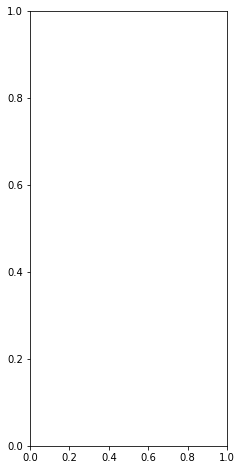

In [28]:

plot_cluster(data.values.reshape(-1, 48)[:50, :], time_index[:50],)